# Windoe Level / Width を調節する

In [2]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 必要なパッケージのインストール
!pip install pydicom
!pip install matplotlib
!pip install -U python-gdcm
!pip install pylibjpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 必要モジュールの導入
%matplotlib inline
import matplotlib.pyplot as plt
import pydicom

In [5]:
# DICOM ファイルの読み込み
DIR = "/content/drive/MyDrive/Colab Notebooks/DICOM/ct2.dcm"
d = pydicom.read_file(DIR)

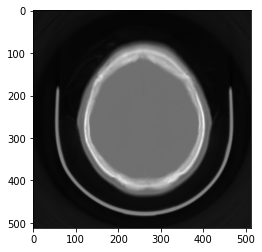

In [6]:
# 画像データを変数に代入
img = d.pixel_array

# 画像表示
plt.imshow(img, cmap='gray')
plt.show()

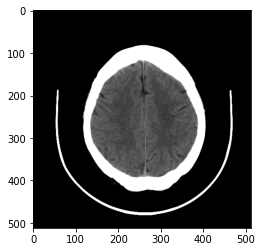

In [8]:
wc = d.WindowCenter
ww = d.WindowWidth
img = d.pixel_array

#ウィンドウ処理
max = wc + ww /2
min = wc - ww /2
img = 255*(img - min) / (max - min)
img[img > 255] = 255
img[img < 0] = 0
plt.imshow(img, cmap='gray')
plt.show()